In [4]:
import numpy as np
import random
import imageio
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [5]:
img1 = imageio.imread("polygons128.png")
img2 = imageio.imread("moon.jpg")

(-0.5, 127.5, 127.5, -0.5)

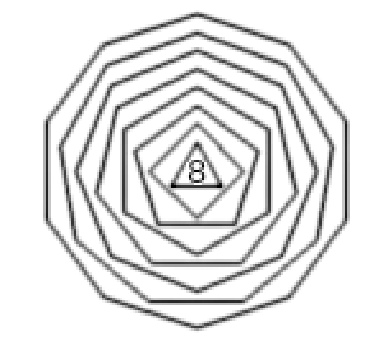

In [6]:
plt.figure(figsize=(6,6)) 
plt.imshow(img1, cmap="gray")
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

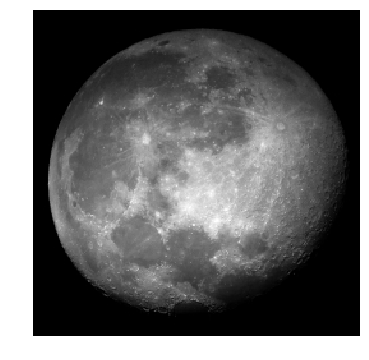

In [7]:
plt.figure(figsize=(6,6)) 
plt.imshow(img2, cmap="gray")
plt.axis('off')

In [6]:
def uniform_noise(size, prob=0.1):
    '''
    Generates a matrix with uniform noise in the range [0-255] to be added to an image
    
    :param size: tuple defining the size of the noise matrix 
    :param prob: probability for the uniform noise generation 
    :type prob: float
    :return matrix with uniform noise to be added to image
    '''
    
    levels = int((prob * 255) // 2)
    noise = np.random.randint(-levels, levels, size)
    
    return noise

def gaussian_noise(size, mean=0, std=0.01):
    '''
    Generates a matrix with Gaussian noise in the range [0-255] to be added to an image
    
    :param size: tuple defining the size of the noise matrix 
    :param mean: mean of the Gaussian distribution
    :param std: standard deviation of the Gaussian distribution, default 0.01
    :return matrix with Gaussian noise to be added to image
    '''
    noise = np.multiply(np.random.normal(mean, std, size), 255)
    
    return noise

def impulsive_noise(image, prob=0.1, mode='salt_and_pepper'):
    '''
    Returns image with impulsive noise (0 and/or 255) to replace pixels in the image with some probability
    
    :param image: input image
    :param prob: probability for the impulsive noise generation 
    :param mode: type of noise, 'salt', 'pepper' or 'salt_and_pepper' (default)
    :type prob: float
    :return noisy image with impulsive noise
    '''

    noise = np.array(image, copy=True)
    for x in np.arange(image.shape[0]):
        for y in np.arange(image.shape[1]):
            rnd = np.random.random()
            if rnd < prob:
                rnd = np.random.random()
                if rnd > 0.5:
                    noise[x,y] = 255
                else:
                    noise[x,y] = 0
    
    return noise

(-0.5, 255.5, 255.5, -0.5)

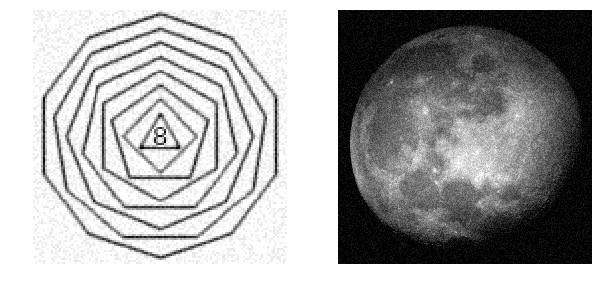

In [8]:
# Images with Uniform Noise

uni_noise = uniform_noise(img1.shape, prob=0.2)
img1_uni = np.clip(img1.astype(int)+uni_noise, 0, 255)

uni_noise = uniform_noise(img2.shape, prob=0.2)
img2_uni = np.clip(img2.astype(int)+uni_noise, 0, 255)


plt.figure(figsize=(10,10))
plt.subplot(121) 
plt.imshow(img1_uni, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(img2_uni, cmap="gray")
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

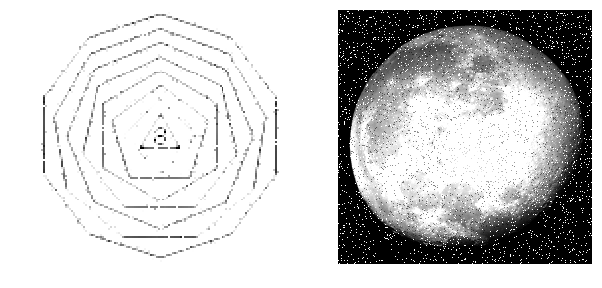

In [17]:
# Images with Impulsive Noise

imp_noise = impulsive_noise(img1, prob=0.1)
img1_imp = np.clip(img1.astype(int)+imp_noise, 0, 255)

imp_noise = impulsive_noise(img2, prob=0.1)
img2_imp = np.clip(img2.astype(int)+imp_noise, 0, 255)


plt.figure(figsize=(10,10))
plt.subplot(121) 
plt.imshow(img1_imp, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(img2_imp, cmap="gray")
plt.axis('off')

(-0.5, 255.5, 255.5, -0.5)

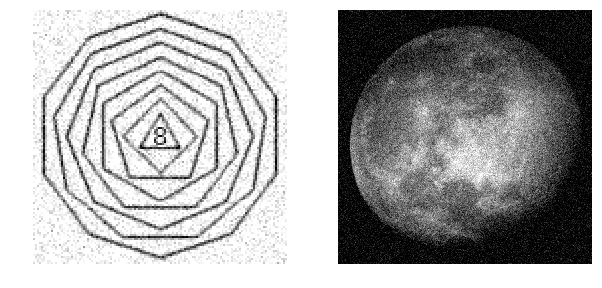

In [7]:
# Images with Gaussian Noise

gau_noise = gaussian_noise(img1.shape, mean=0, std=0.1)
img1_gau = np.clip(img1.astype(int)+gau_noise, 0, 255)
#imageio.imwrite('poly_noised.png', img1_gau) 

gau_noise = gaussian_noise(img2.shape, mean=0, std=0.1)
img2_gau = np.clip(img2.astype(int)+gau_noise, 0, 255)
#imageio.imwrite('moon_noised.png', img2_gau) 


plt.figure(figsize=(10,10))
plt.subplot(121) 
plt.imshow(img1_gau, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(img2_gau, cmap="gray")
plt.axis('off')

In [8]:
# Function that calculates how far the images are from the testing set    
def RMSE(image1, image2):
    image1 = image1.astype(float)
    image2 = image2.astype(float)
    return np.float(np.sqrt(((image1 - image2)**2).mean()))

# A simple function for visualization
def comparing_images(image1, image2):
    _ = plt.figure(figsize=(5,5))
    _ = plt.subplot(1,2,1)
    _ = plt.imshow(image1, cmap='gray')
    _ = plt.subplot(1,2,2)
    _ = plt.imshow(image2, cmap='gray')
    plt.show()
    
def check_dispersion_n(value):
    if value == 0:
        return 1
    return value

def check_dispersion_l(value, disp_n):
    if value == 0:
        return disp_n
    return value

def create_mask_center_value(size):
    center = size//2
    mask = np.zeros([size, size])
    mask[center, center] = 1
    return mask

def get_interquatile_range(matrix):
    percentiles = np.percentile(matrix, [75, 25])
    return percentiles[0] - percentiles[1]

def RMSE(image1, image2):
    image1 = image1.astype(float)
    image2 = image2.astype(float)
    return np.float(np.sqrt(((image1 - image2)**2).mean()))

def rmse(f,g):
    size = f.shape
    return np.sqrt(np.sum(np.square(f-g))/(size[0]*size[1]))

def normalization(image, reference):
    min_ = np.min(image)
    max_ = np.max(image)
    quantized_image = np.max(reference)*(((image - min_)/(max_ - min_)))
    return quantized_image

In [9]:
print("RMSE degraded image 1")
print(RMSE(img1, img1_gau))
#print(rmse(img1, img1_deg))

print("RMSE degraded image 2")
print(RMSE(img2, img2_gau))
#print(rmse(img2, img2_deg))

RMSE degraded image 1
20.293732180427796
RMSE degraded image 2
22.692860363389485


In [10]:
def denoising(image, type_of_filter, parameter_size, parameter_gamma):
    
    padding = int((parameter_size - 1)/2)
    reshaped_image = np.pad(image, ((padding, padding),(padding, padding)), mode='constant') # Gotta check if constant or symmetric
    filtered_image = []
    center_mask = create_mask_center_value(parameter_size)
    temp_matrix = np.zeros([parameter_size, parameter_size])
    center_pixel, centr_l, disp_l = 0,0,0
    
    if type_of_filter == 1: # Average mode
    
        disp_n = check_dispersion_n(np.std(reshaped_image[0:(reshaped_image.shape[0]//6 - 1), 0:(reshaped_image.shape[1]//6 - 1)]))

        for row in range(reshaped_image.shape[0] - parameter_size + 1):
            for column in range(reshaped_image.shape[1] - parameter_size + 1):
                temp_matrix = reshaped_image[row:parameter_size+row, column:parameter_size+column]
                centr_l = temp_matrix.mean()
                disp_l = check_dispersion_l(temp_matrix.std(), disp_n)
                center_pixel = np.sum(temp_matrix*center_mask)
                filtered_image.append(center_pixel - parameter_gamma * (disp_n / disp_l) * (center_pixel - centr_l))
    
    elif type_of_filter == 2: # Robust mode
        
        disp_n = get_interquatile_range(reshaped_image[0:(reshaped_image.shape[0]//6 - 1), 0:(reshaped_image.shape[1]//6 - 1)]) # Interquatile Range

        for row in range(reshaped_image.shape[0] - parameter_size + 1):
            for column in range(reshaped_image.shape[1] - parameter_size + 1):
                temp_matrix = reshaped_image[row:parameter_size+row, column:parameter_size+column]
                centr_l = np.median(temp_matrix)
                disp_l = check_dispersion_l(get_interquatile_range(temp_matrix), disp_n) # Interquatile Range
                center_pixel = np.sum(temp_matrix*center_mask)
                filtered_image.append(center_pixel - parameter_gamma * (disp_n / disp_l) * (center_pixel - centr_l))

    filtered_image = np.array(filtered_image).reshape(image.shape[0], image.shape[1])
        
    filtered_image = normalization(filtered_image, image)
    
    return filtered_image    

RMSE denoised image 1 - Average Mode
91.16727699966724
RMSE denoised image 1 - Robust Mode
229.30823489506466


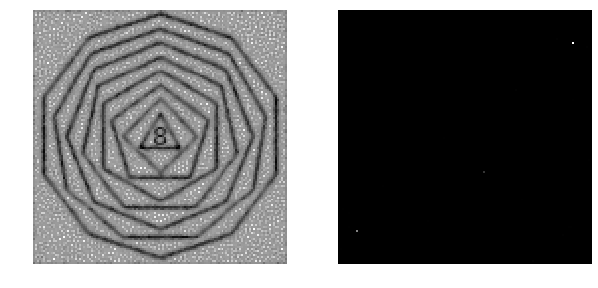

In [13]:
#img1_deg = imageio.imread('poly_noised.png')
img1_denoised_avg = denoising(img1_gau, 1, 3, 0.5)
img1_denoised_rob = denoising(img1_gau, 2, 3, 0.9)
    
plt.figure(figsize=(10,10))
plt.subplot(121) 
plt.imshow(img1_denoised_avg, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(img1_denoised_rob, cmap="gray")
plt.axis('off')

print("RMSE denoised image 1 - Average Mode")
print(RMSE(img1, img1_denoised_avg))

print("RMSE denoised image 1 - Robust Mode")
print(RMSE(img1, img1_denoised_rob))